In [1]:
import numpy as np
import matplotlib.pyplot as plt
import prisoner_dilemma as prd
import strategies as strat


# Strategies 
Importing relevant strategies from the strategies.py module and creating the combinaton array to iterate over for the competition

In [3]:
strat_list = np.array([strat.e4e, strat.e4e, strat.e4e, strat.e4e, strat.e4e, strat.e4e, strat.random, strat.nice, strat.nasty, strat.nice_e4e, strat.probing_5, strat.grudge_5, strat.probing_10, strat.grudge_10, strat.diffident_e4e, strat.very_diffident_e4e, strat.probing_shy, strat.probing_good, strat.probing_bad, strat.probing_trembling])
strat_comb = np.transpose(np.vstack((np.tile(strat_list, np.size(strat_list)), np.repeat(strat_list, np.size(strat_list)))))
print(strat_comb)

[[e4e e4e]
 [e4e e4e]
 [e4e e4e]
 [e4e e4e]
 [e4e e4e]
 [e4e e4e]
 [Random e4e]
 [Nice e4e]
 [Nasty e4e]
 [nice_e4e e4e]
 [probing_5 e4e]
 [grudge_5 e4e]
 [probing_10 e4e]
 [grudge_10 e4e]
 [diffident_e4e e4e]
 [very_diffident_e4e e4e]
 [probing_shy e4e]
 [probing_good e4e]
 [probing_bad e4e]
 [probing_tembling e4e]
 [e4e e4e]
 [e4e e4e]
 [e4e e4e]
 [e4e e4e]
 [e4e e4e]
 [e4e e4e]
 [Random e4e]
 [Nice e4e]
 [Nasty e4e]
 [nice_e4e e4e]
 [probing_5 e4e]
 [grudge_5 e4e]
 [probing_10 e4e]
 [grudge_10 e4e]
 [diffident_e4e e4e]
 [very_diffident_e4e e4e]
 [probing_shy e4e]
 [probing_good e4e]
 [probing_bad e4e]
 [probing_tembling e4e]
 [e4e e4e]
 [e4e e4e]
 [e4e e4e]
 [e4e e4e]
 [e4e e4e]
 [e4e e4e]
 [Random e4e]
 [Nice e4e]
 [Nasty e4e]
 [nice_e4e e4e]
 [probing_5 e4e]
 [grudge_5 e4e]
 [probing_10 e4e]
 [grudge_10 e4e]
 [diffident_e4e e4e]
 [very_diffident_e4e e4e]
 [probing_shy e4e]
 [probing_good e4e]
 [probing_bad e4e]
 [probing_tembling e4e]
 [e4e e4e]
 [e4e e4e]
 [e4e e4e]
 [e4e e4e]
 [

# Competition

## Basic exploration on parameters

We need to find a good value for numRounds, for this reason we run the simulation with multiple values of nRounds to study the result

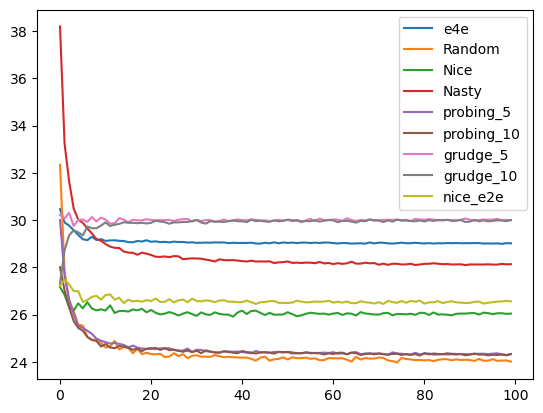

In [36]:
iterations_on_Num = 100
num_min = 10
num_max = 1000
results = {strat_list[i].name: np.zeros(100) for i in range(np.size(strat_list))}
counter = 0
for sampleNum in np.linspace(num_min, num_max, iterations_on_Num):
    totaladded = 0
    matches = np.array([])
    for pairs in strat_comb:
        current_match = prd.Match(pairs[0], pairs[1], sigma_randomRounds = 1, numRounds = sampleNum) # sigma_randomRounds needs to be small because there is no control on the positiveness of nRounds and the smallest (average) nRounds is only 10
        current_match.play()
        matches = np.append(matches, current_match)
        current_scores = current_match.avgscore()
        results[pairs[0].name][counter] += current_scores[0] / sampleNum
        results[pairs[1].name][counter] += current_scores[1] / sampleNum
    counter += 1

fig, ax = plt.subplots()

for (k,v) in results.items():
    ax.plot(v, label = k)
ax.legend()

plt.show()

We find how around $\texttt{nrounds} \approx 200$ the simulations reach a stable equilibrium, this allows to keep $\texttt{nrounds} = 200$ for the rest of the study. 

It can also be seen how the value of $\texttt{rep} = 5$ produces a reasonably smooth result, thus it will be used without further analisys for the moment. 

In [3]:
sigma_rr = 10 # sigma_randomRounds
nrounds = 200 # numRounds
rep = 5 # repetitions

## Competition at fixed numRounds

[(383.39500000000004, 'e4e'), (64.817, 'grudge_10'), (64.74500000000002, 'grudge_5'), (64.074, 'nice_e4e'), (61.36000000000001, 'Nice'), (56.77900000000001, 'Random'), (55.29800000000001, 'Nasty'), (55.271000000000015, 'probing_good'), (53.21600000000001, 'probing_tembling'), (53.167, 'diffident_e4e'), (51.12099999999999, 'probing_shy'), (50.95500000000001, 'probing_bad'), (50.840999999999994, 'probing_5'), (50.775, 'probing_10'), (48.272999999999996, 'very_diffident_e4e')]


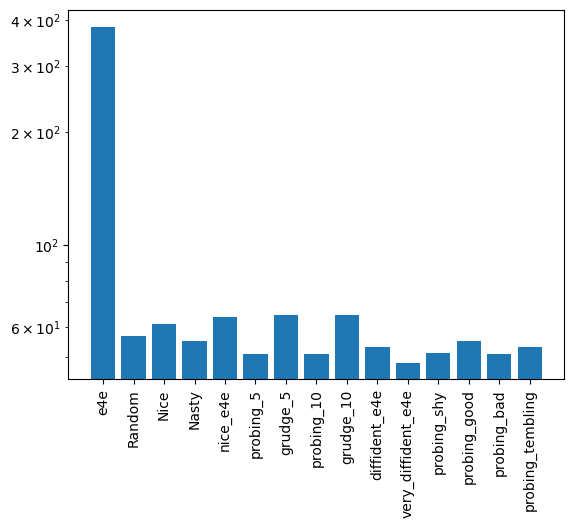

In [4]:
results = {strat_list[i].name: 0 for i in range(np.size(strat_list))}
for pairs in strat_comb:
    current_match = prd.Match(pairs[0], pairs[1])
    current_match.play()
    current_scores = current_match.avgscore()
    results[pairs[0].name] += current_scores[0] / current_match.numRounds[0]
    results[pairs[1].name] += current_scores[1] / current_match.numRounds[0]

# printing in order 
toprint = [ (v,k) for k,v in results.items() ]
toprint.sort(reverse = True)
print(toprint)

# plotting the result 
results["e4e"] /= 6
fig, ax = plt.subplots()
ax.bar(range(len(results)), list(results.values()), align = 'center')
ax.set_xticks(range(len(results)), list(results.keys()), rotation=90)
ax.set_yscale("log")
plt.show()


## Competition with different sigma in numRounds

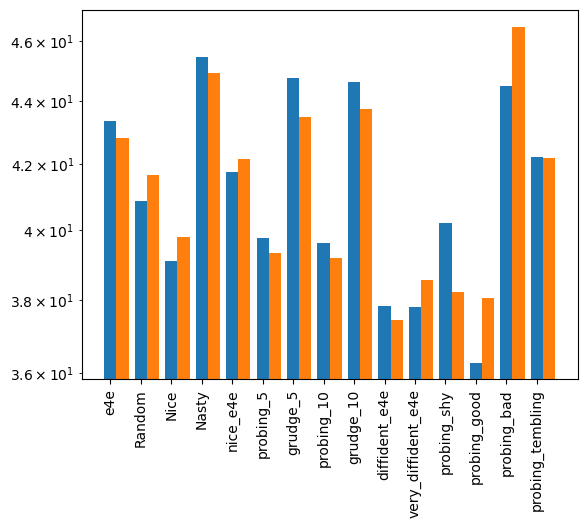

In [4]:
results = {strat_list[i].name: 0 for i in range(np.size(strat_list))}
for pairs in strat_comb:
    current_match = prd.Match(pairs[0], pairs[1], sigma_randomRounds=20)
    current_match.play()
    current_scores = current_match.avgscore()
    results[pairs[0].name] += current_scores[0] / current_match.avg_numRounds
    results[pairs[1].name] += current_scores[1] / current_match.avg_numRounds

results_bigsigma = {strat_list[i].name: 0 for i in range(np.size(strat_list))}
for pairs in strat_comb:
    current_match = prd.Match(pairs[0], pairs[1], sigma_randomRounds=50)
    current_match.play()
    current_scores = current_match.avgscore()
    results_bigsigma[pairs[0].name] += current_scores[0] / current_match.avg_numRounds
    results_bigsigma[pairs[1].name] += current_scores[1] / current_match.avg_numRounds

# printing in order 
# toprint = [ (v,k) for k,v in results.items() ]
# toprint.sort(reverse = True)
# print(toprint)

# plotting the result 
fig, ax = plt.subplots()
ax.bar(range(len(results)), list(results.values()), align = 'center', width = 0.4)
ax.bar(np.array(range((len(results_bigsigma))))+0.4, list(results_bigsigma.values()), align = 'center', width = 0.4)
ax.set_xticks(range(len(results)), list(results.keys()), rotation=90)
ax.set_yscale("log")
plt.show()

Note how the first 3 strategies are all nice. Note also how the simpler strategy $\texttt{e4e}$ works well especially when compared with the more complex $\texttt{probing\_x}$ strategy